In [13]:
"""удалось запустить h2o только в колабе, поэтому, наверное, у вас не получится повторить мои шаги, но постараюсь комментами объяснить"""
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1xhsyl1b
  JVM stdout: /tmp/tmp1xhsyl1b/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1xhsyl1b/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_1tag95
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [34]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.cluster().show_status()

H2O_cluster_uptime:,17 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_1tag95
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [38]:
import pandas as pd
import numpy as np


In [24]:
from h2o.automl import H2OAutoML

In [39]:
# т.к. не нашёл как адекватно сделать категориальные данные в "воде", пришлось
# сначала преобразовать данные в пандас, а потом создать фрейм "воды"
pd_data = pd.read_csv("/winequality-white.csv", sep=';')
wine = h2o.import_file("/winequality-white.csv")
wine

Parse progress: |█████████████████████████████████████████████████████████| 100%


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11,6


In [48]:
# т.к. не нашёл как адекватно сделать категориальные данные в "воде", пришлось
# сначала преобразовать данные в пандас, а потом создать фрейм "воды"
pd_data = pd.read_csv("/winequality-white.csv", sep=';')
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
pd_data['quality']  = pd.cut(pd_data['quality'], bins = bins, labels = group_names)

In [49]:
pd_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,bad


In [50]:
wine = h2o.H2OFrame(pd_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [52]:
wine.describe()

Rows:4898
Cols:12




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,real,real,real,real,real,real,real,real,real,real,real,enum
mins,3.8,0.08,0.0,0.6,0.009000000000000001,2.0,9.0,0.98711,2.72,0.22,8.0,
mean,6.854787668436091,0.2782411188240106,0.33419150673744413,6.3914148632094765,0.045772356063699456,35.3080849326256,138.36065741118816,0.9940273764801961,3.188266639444672,0.4898468762760303,10.514267047774577,
maxs,14.2,1.1,1.66,65.8,0.34600000000000003,289.0,440.0,1.03898,3.82,1.08,14.2,
sigma,0.8438682276875127,0.10079454842486532,0.12101980420298254,5.072057784014878,0.0218479680937288,17.007137325232595,42.498064554142985,0.002990906916936996,0.15100059961506676,0.1141258339488322,1.2306205677573203,
zeros,0,0,19,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,bad
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,bad
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,bad


In [53]:
wine_train, wine_test, wine_valid = wine.split_frame(ratios=[.7, .15]) # разделение на обучающую, тестовую и валидационную выборки

In [54]:
y = "quality"
x = wine.columns
x.remove(y)


In [55]:
# насколько я разобрался, в "воде" можно автоматически поучиться всеми моделями,
# что я нашёл давольно-таки приятным
# но на форумах не рекомендуют "StackedEnsemble", "DeepLearning" типа неинформативные и энергозатратные
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [56]:
aml.train(x = x, y = y, training_frame = wine_train, validation_frame=wine_valid) #тренировка

AutoML progress: |
14:14:24.773: Project: AutoML_20201004_141424769
14:14:24.774: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:14:24.775: Setting stopping tolerance adaptively based on the training frame: 0.017107143980890235
14:14:24.775: Build control seed: 10
14:14:24.775: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
14:14:24.837: training frame: Frame key: automl_training_py_12_sid_8bf3    cols: 12    rows: 3084  chunks: 1    size: 117588  checksum: 811165430760354768
14:14:24.837: validation frame: Frame key: py_14_sid_8bf3    cols: 12    rows: 704  chunks: 1    size: 20442  checksum: -1760253439422485116
14:14:24.838: leaderboard frame: Frame key: automl_leaderboard_py_12_sid_8bf3    cols: 12    rows: 333  chunks: 1    size: 16816  checksum: -1511980153492457264
14:14:24.838: blending frame: NULL
14:14:24.838: response column: quality

In [57]:
lb = aml.leaderboard

In [58]:
lb.head() # получаем фрейм с моделями и их оценкой ошибок

model_id,mean_per_class_error,logloss,rmse,mse
GBM_3_AutoML_20201004_141424,0.133015,0.226289,0.257798,0.06646
XGBoost_1_AutoML_20201004_141424,0.135404,0.256108,0.274685,0.0754518
GBM_2_AutoML_20201004_141424,0.148945,0.266567,0.281741,0.0793779
DRF_1_AutoML_20201004_141424,0.149144,0.253432,0.274013,0.075083
GBM_5_AutoML_20201004_141424,0.14994,0.288781,0.294972,0.0870083
XGBoost_3_AutoML_20201004_141424,0.153923,0.276713,0.288198,0.0830581
GBM_4_AutoML_20201004_141424,0.16129,0.233384,0.264686,0.0700584
XGBoost_2_AutoML_20201004_141424,0.171047,0.272645,0.286649,0.0821678
GBM_1_AutoML_20201004_141424,0.171247,0.256478,0.277962,0.0772626
GLM_1_AutoML_20201004_141424,0.242931,0.349421,0.325879,0.106197


In [59]:
wine_pred=aml.leader.predict(wine_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [60]:
wine_pred.head() # фрейм с предикторами

predict,bad,good,nan
bad,0.975393,0.0243556,0.00025154
bad,0.95137,0.0483196,0.000309959
bad,0.99064,0.00915244,0.00020712
bad,0.994076,0.00576349,0.000160519
bad,0.921631,0.0779156,0.00045303
bad,0.983404,0.016376,0.000219771
bad,0.994758,0.00510505,0.00013725
bad,0.979428,0.0202875,0.000284879
bad,0.994745,0.00511294,0.000142314
bad,0.98962,0.0102004,0.0001792


In [61]:
aml.leader.model_performance(wine_test) # получилась тройка лидеров


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.09927951476936299
RMSE: 0.31508651949799915
LogLoss: 0.3394004787255563
Mean Per-Class Error: 0.4907142857142857

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,567.0,33.0,0.0,0.055000,33 / 600
1,73.0,102.0,0.0,0.417143,73 / 175
2,1.0,1.0,0.0,1.000000,2 / 2
3,641.0,136.0,0.0,0.138996,108 / 777



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.861004
1,2,0.997426
2,3,1.000000


In [63]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_3_AutoML_20201004_141424',
 'XGBoost_1_AutoML_20201004_141424',
 'GBM_2_AutoML_20201004_141424',
 'DRF_1_AutoML_20201004_141424',
 'GBM_5_AutoML_20201004_141424',
 'XGBoost_3_AutoML_20201004_141424',
 'GBM_4_AutoML_20201004_141424',
 'XGBoost_2_AutoML_20201004_141424',
 'GBM_1_AutoML_20201004_141424',
 'GLM_1_AutoML_20201004_141424']

In [64]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
# в конце очень информативный фрейм с важностью тех или иных фичей

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20201004_141424


Model Summary: 


,,number_of_trees
0,,45.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.01759583670347721
RMSE: 0.1326492996720194
LogLoss: 0.09340997066969771
Mean Per-Class Error: 0.34186992777809483

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,2409.0,4.0,0.0,0.001658,"4 / 2,413"
1,16.0,652.0,0.0,0.023952,16 / 668
2,1.0,2.0,0.0,1.000000,3 / 3
3,2426.0,658.0,0.0,0.007458,"23 / 3,084"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.992542
1,2,0.999027
2,3,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.09764917465629329
RMSE: 0.31248867924501406
LogLoss: 0.32303321302159826
Mean Per-Class Error: 0.14101018531398277

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,512.0,34.0,0.0,0.062271,34 / 546
1,57.0,101.0,0.0,0.360759,57 / 158
2,0.0,0.0,0.0,NaN,0 / 0
3,569.0,135.0,0.0,0.129261,91 / 704



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.870739
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-10-04 14:14:25,0.059 sec,0.0,0.666667,1.098612,0.217575,0.666667,1.098612,0.224432
1,,2020-10-04 14:14:25,0.280 sec,5.0,0.361304,0.430993,0.105058,0.402818,0.504409,0.173295
2,,2020-10-04 14:14:25,0.469 sec,10.0,0.277217,0.275480,0.078470,0.346746,0.387249,0.147727
3,,2020-10-04 14:14:25,0.694 sec,15.0,0.241383,0.214975,0.063878,0.328583,0.346905,0.144886
4,,2020-10-04 14:14:25,0.897 sec,20.0,0.215724,0.179749,0.047341,0.321235,0.332485,0.143466
5,,2020-10-04 14:14:26,1.189 sec,25.0,0.196015,0.155627,0.036965,0.318128,0.327527,0.136364
6,,2020-10-04 14:14:26,1.461 sec,30.0,0.176781,0.134868,0.027237,0.313526,0.324292,0.133523
7,,2020-10-04 14:14:26,1.684 sec,35.0,0.160044,0.118105,0.020104,0.313668,0.326229,0.127841
8,,2020-10-04 14:14:26,1.944 sec,40.0,0.146242,0.105242,0.011025,0.314184,0.326123,0.130682
9,,2020-10-04 14:14:27,2.115 sec,45.0,0.132649,0.093410,0.007458,0.312489,0.323033,0.129261



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,density,706.181091,1.000000,0.156119
1,alcohol,447.175903,0.633231,0.098859
2,total sulfur dioxide,407.057404,0.576421,0.089990
3,volatile acidity,405.538971,0.574271,0.089654
4,free sulfur dioxide,400.974365,0.567807,0.088645
5,residual sugar,393.400574,0.557082,0.086971
6,citric acid,390.830841,0.553443,0.086403
7,pH,371.929779,0.526678,0.082224
8,chlorides,361.484314,0.511886,0.079915
9,sulphates,320.243317,0.453486,0.070798


In [65]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out.params
# это я честно не знаю, что значит, но вроде, нужно

{'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'multinomial',
  'default': 'AUTO',
  'input': 'multinomial'},
 'dmatrix_type': {'actual': 'dense', '

In [66]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'num_class': 3,
  'objective': 'multi:softprob',
  'seed': 10,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [67]:

out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [69]:
out.confusion_matrix(out_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20201004_141424


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,85.0,255.0,232595.0,3.0,8.0,7.980392,4.0,113.0,67.87843




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.009580966429098642
RMSE: 0.09788241123459639
LogLoss: 0.06600708301550803
Mean Per-Class Error: 0.002994011976047904

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,2413.0,0.0,0.0,0.000000,"0 / 2,413"
1,6.0,662.0,0.0,0.008982,6 / 668
2,0.0,0.0,3.0,0.000000,0 / 3
3,2419.0,662.0,3.0,0.001946,"6 / 3,084"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.998054
1,2,1.000000
2,3,1.000000



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.0859355444922882
RMSE: 0.29314764964483037
LogLoss: 0.29331666314374405
Mean Per-Class Error: 0.13757128947002364

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,528.0,18.0,0.0,0.032967,18 / 546
1,60.0,98.0,0.0,0.379747,60 / 158
2,0.0,0.0,0.0,NaN,0 / 0
3,588.0,116.0,0.0,0.110795,78 / 704



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.889205
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-10-04 14:14:46,0.016 sec,0.0,0.666667,1.098612,0.324254,0.666667,1.098612,0.338068
1,,2020-10-04 14:14:46,0.268 sec,5.0,0.474625,0.644562,0.114462,0.495675,0.688925,0.171875
2,,2020-10-04 14:14:46,0.531 sec,10.0,0.364352,0.439195,0.092088,0.405958,0.513050,0.160511
3,,2020-10-04 14:14:47,0.838 sec,15.0,0.303565,0.331235,0.070687,0.364400,0.430059,0.142045
4,,2020-10-04 14:14:47,1.155 sec,20.0,0.269300,0.269835,0.062257,0.343561,0.385411,0.149148
5,,2020-10-04 14:14:47,1.574 sec,25.0,0.242503,0.226277,0.052529,0.329368,0.355594,0.136364
6,,2020-10-04 14:14:48,1.845 sec,30.0,0.222815,0.196368,0.043126,0.321742,0.339944,0.125000
7,,2020-10-04 14:14:48,2.094 sec,35.0,0.204409,0.172031,0.035992,0.315449,0.328201,0.119318
8,,2020-10-04 14:14:48,2.315 sec,40.0,0.191902,0.156356,0.030156,0.311347,0.320884,0.116477
9,,2020-10-04 14:14:48,2.579 sec,45.0,0.181607,0.144059,0.025292,0.307182,0.313845,0.113636



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,alcohol,905.120178,1.000000,0.239150
1,density,429.380432,0.474391,0.113450
2,residual sugar,330.394562,0.365028,0.087296
3,pH,322.493469,0.356299,0.085209
4,sulphates,295.757721,0.326761,0.078145
5,volatile acidity,295.749176,0.326751,0.078142
6,total sulfur dioxide,283.457611,0.313171,0.074895
7,free sulfur dioxide,278.496216,0.307690,0.073584
8,citric acid,245.963898,0.271747,0.064988
9,fixed acidity,209.268082,0.231205,0.055293


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20201004_141424


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,85.0,255.0,232595.0,3.0,8.0,7.980392,4.0,113.0,67.87843




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.009580966429098642
RMSE: 0.09788241123459639
LogLoss: 0.06600708301550803
Mean Per-Class Error: 0.002994011976047904

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,2413.0,0.0,0.0,0.000000,"0 / 2,413"
1,6.0,662.0,0.0,0.008982,6 / 668
2,0.0,0.0,3.0,0.000000,0 / 3
3,2419.0,662.0,3.0,0.001946,"6 / 3,084"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.998054
1,2,1.000000
2,3,1.000000



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.0859355444922882
RMSE: 0.29314764964483037
LogLoss: 0.29331666314374405
Mean Per-Class Error: 0.13757128947002364

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,528.0,18.0,0.0,0.032967,18 / 546
1,60.0,98.0,0.0,0.379747,60 / 158
2,0.0,0.0,0.0,NaN,0 / 0
3,588.0,116.0,0.0,0.110795,78 / 704



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.889205
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-10-04 14:14:46,0.016 sec,0.0,0.666667,1.098612,0.324254,0.666667,1.098612,0.338068
1,,2020-10-04 14:14:46,0.268 sec,5.0,0.474625,0.644562,0.114462,0.495675,0.688925,0.171875
2,,2020-10-04 14:14:46,0.531 sec,10.0,0.364352,0.439195,0.092088,0.405958,0.513050,0.160511
3,,2020-10-04 14:14:47,0.838 sec,15.0,0.303565,0.331235,0.070687,0.364400,0.430059,0.142045
4,,2020-10-04 14:14:47,1.155 sec,20.0,0.269300,0.269835,0.062257,0.343561,0.385411,0.149148
5,,2020-10-04 14:14:47,1.574 sec,25.0,0.242503,0.226277,0.052529,0.329368,0.355594,0.136364
6,,2020-10-04 14:14:48,1.845 sec,30.0,0.222815,0.196368,0.043126,0.321742,0.339944,0.125000
7,,2020-10-04 14:14:48,2.094 sec,35.0,0.204409,0.172031,0.035992,0.315449,0.328201,0.119318
8,,2020-10-04 14:14:48,2.315 sec,40.0,0.191902,0.156356,0.030156,0.311347,0.320884,0.116477
9,,2020-10-04 14:14:48,2.579 sec,45.0,0.181607,0.144059,0.025292,0.307182,0.313845,0.113636



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,alcohol,905.120178,1.000000,0.239150
1,density,429.380432,0.474391,0.113450
2,residual sugar,330.394562,0.365028,0.087296
3,pH,322.493469,0.356299,0.085209
4,sulphates,295.757721,0.326761,0.078145
5,volatile acidity,295.749176,0.326751,0.078142
6,total sulfur dioxide,283.457611,0.313171,0.074895
7,free sulfur dioxide,278.496216,0.307690,0.073584
8,citric acid,245.963898,0.271747,0.064988
9,fixed acidity,209.268082,0.231205,0.055293


H2OTypeError: ignored

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20201004_141424


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,85.0,255.0,232595.0,3.0,8.0,7.980392,4.0,113.0,67.87843




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.009580966429098642
RMSE: 0.09788241123459639
LogLoss: 0.06600708301550803
Mean Per-Class Error: 0.002994011976047904

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,2413.0,0.0,0.0,0.000000,"0 / 2,413"
1,6.0,662.0,0.0,0.008982,6 / 668
2,0.0,0.0,3.0,0.000000,0 / 3
3,2419.0,662.0,3.0,0.001946,"6 / 3,084"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.998054
1,2,1.000000
2,3,1.000000



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.0859355444922882
RMSE: 0.29314764964483037
LogLoss: 0.29331666314374405
Mean Per-Class Error: 0.13757128947002364

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,bad,good,nan,Error,Rate
0,528.0,18.0,0.0,0.032967,18 / 546
1,60.0,98.0,0.0,0.379747,60 / 158
2,0.0,0.0,0.0,NaN,0 / 0
3,588.0,116.0,0.0,0.110795,78 / 704



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.889205
1,2,1.000000
2,3,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
0,,2020-10-04 14:14:46,0.016 sec,0.0,0.666667,1.098612,0.324254,0.666667,1.098612,0.338068
1,,2020-10-04 14:14:46,0.268 sec,5.0,0.474625,0.644562,0.114462,0.495675,0.688925,0.171875
2,,2020-10-04 14:14:46,0.531 sec,10.0,0.364352,0.439195,0.092088,0.405958,0.513050,0.160511
3,,2020-10-04 14:14:47,0.838 sec,15.0,0.303565,0.331235,0.070687,0.364400,0.430059,0.142045
4,,2020-10-04 14:14:47,1.155 sec,20.0,0.269300,0.269835,0.062257,0.343561,0.385411,0.149148
5,,2020-10-04 14:14:47,1.574 sec,25.0,0.242503,0.226277,0.052529,0.329368,0.355594,0.136364
6,,2020-10-04 14:14:48,1.845 sec,30.0,0.222815,0.196368,0.043126,0.321742,0.339944,0.125000
7,,2020-10-04 14:14:48,2.094 sec,35.0,0.204409,0.172031,0.035992,0.315449,0.328201,0.119318
8,,2020-10-04 14:14:48,2.315 sec,40.0,0.191902,0.156356,0.030156,0.311347,0.320884,0.116477
9,,2020-10-04 14:14:48,2.579 sec,45.0,0.181607,0.144059,0.025292,0.307182,0.313845,0.113636



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,alcohol,905.120178,1.000000,0.239150
1,density,429.380432,0.474391,0.113450
2,residual sugar,330.394562,0.365028,0.087296
3,pH,322.493469,0.356299,0.085209
4,sulphates,295.757721,0.326761,0.078145
5,volatile acidity,295.749176,0.326751,0.078142
6,total sulfur dioxide,283.457611,0.313171,0.074895
7,free sulfur dioxide,278.496216,0.307690,0.073584
8,citric acid,245.963898,0.271747,0.064988
9,fixed acidity,209.268082,0.231205,0.055293


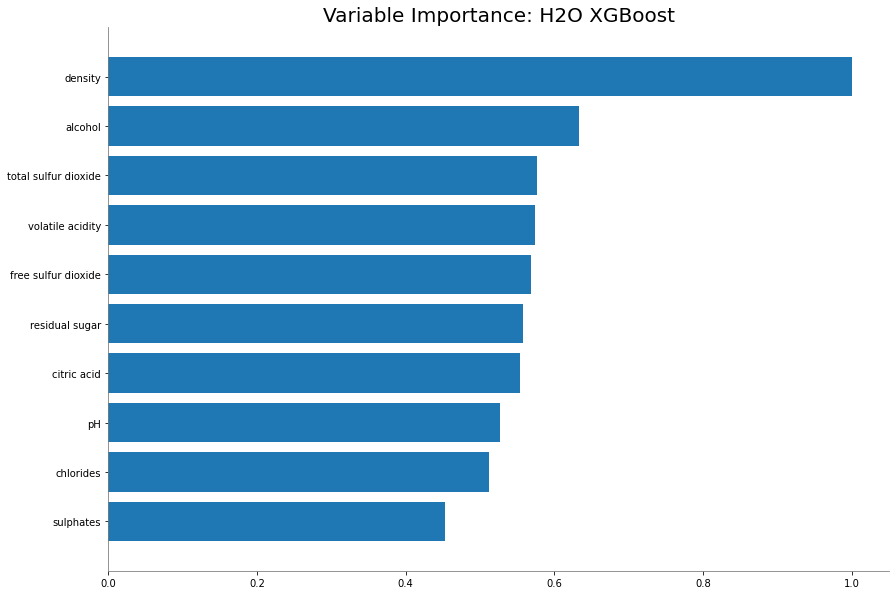

In [70]:
out.varimp_plot() # ну и график для наглядности